In [155]:
import folium
from shapely.ops import cascaded_union
from folium import Marker, PolyLine
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
import geopandas as gpd
from shapely.geometry import Point, LineString
TURK_LAT = 39.0618
TURK_LNG = 33.7500


In [156]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [157]:

encoding_list = ['ascii', 'big5', 'big5hkscs', 'cp037', 'cp273', 'cp424', 'cp437', 'cp500', 'cp720', 'cp737'
                 , 'cp775', 'cp850', 'cp852', 'cp855', 'cp856', 'cp857', 'cp858', 'cp860', 'cp861', 'cp862'
                 , 'cp863', 'cp864', 'cp865', 'cp866', 'cp869', 'cp874', 'cp875', 'cp932', 'cp949', 'cp950'
                 , 'cp1006', 'cp1026', 'cp1125', 'cp1140', 'cp1250', 'cp1251', 'cp1252', 'cp1253', 'cp1254'
                 , 'cp1255', 'cp1256', 'cp1257', 'cp1258', 'euc_jp', 'euc_jis_2004', 'euc_jisx0213', 'euc_kr'
                 , 'gb2312', 'gbk', 'gb18030', 'hz', 'iso2022_jp', 'iso2022_jp_1', 'iso2022_jp_2'
                 , 'iso2022_jp_2004', 'iso2022_jp_3', 'iso2022_jp_ext', 'iso2022_kr', 'latin_1', 'iso8859_2'
                 , 'iso8859_3', 'iso8859_4', 'iso8859_5', 'iso8859_6', 'iso8859_7', 'iso8859_8', 'iso8859_9'
                 , 'iso8859_10', 'iso8859_11', 'iso8859_13', 'iso8859_14', 'iso8859_15', 'iso8859_16', 'johab'
                 , 'koi8_r', 'koi8_t', 'koi8_u', 'kz1048', 'mac_cyrillic', 'mac_greek', 'mac_iceland', 'mac_latin2'
                 , 'mac_roman', 'mac_turkish', 'ptcp154', 'shift_jis', 'shift_jis_2004', 'shift_jisx0213', 'utf_32'
                 , 'utf_32_be', 'utf_32_le', 'utf_16']

for encoding in encoding_list:
    worked = True
    try:
        df = pd.read_csv("eq20.csv", encoding=encoding, nrows=5)
    except:
        worked = False
    if worked and str(df[df.columns[0]][0]) != "nan":
        print(encoding, ':\n', df.head())
        break
        
    

utf_16 :
    ID                DATE_            LOCATION_      LAT      LNG  MAG  DEPTH  \
0   1  2005-01-01 00:29:42  KORKUTELi (ANTALYA)  36.9197  30.3133  2.9   30.0   
1   2  2005-01-01 03:03:40        YUNAK (KONYA)  38.8177  31.8875  3.5    5.8   
2   3  2005-01-01 04:40:14              AKDENiZ  36.1153  28.4915  3.5   74.5   
3   4  2005-01-01 09:35:00       CUBUK (ANKARA)  40.3485  32.9603  3.0   15.1   
4   5  2005-01-01 11:17:43      MENEMEN (iZMiR)  38.8013  27.2075  2.9   28.3   

                      RECORDDATE  
0  2023-02-27 15:01:52.367000000  
1  2023-02-27 15:01:52.367000000  
2  2023-02-27 15:01:52.367000000  
3  2023-02-27 15:01:52.367000000  
4  2023-02-27 15:01:52.367000000  


In [158]:
df = pd.read_csv("eq20.csv", encoding=encoding, error_bad_lines=False)
df

b'Skipping line 114421: expected 8 fields, saw 9\nSkipping line 115729: expected 8 fields, saw 9\nSkipping line 117563: expected 8 fields, saw 9\nSkipping line 118716: expected 8 fields, saw 9\nSkipping line 127421: expected 8 fields, saw 9\nSkipping line 128142: expected 8 fields, saw 9\n'
b'Skipping line 137960: expected 8 fields, saw 9\nSkipping line 138066: expected 8 fields, saw 9\nSkipping line 139689: expected 8 fields, saw 9\nSkipping line 140753: expected 8 fields, saw 9\nSkipping line 141426: expected 8 fields, saw 9\nSkipping line 142841: expected 8 fields, saw 9\nSkipping line 142844: expected 8 fields, saw 9\nSkipping line 142846: expected 8 fields, saw 9\nSkipping line 144861: expected 8 fields, saw 9\nSkipping line 145582: expected 8 fields, saw 9\nSkipping line 146689: expected 8 fields, saw 9\nSkipping line 149056: expected 8 fields, saw 9\nSkipping line 150251: expected 8 fields, saw 9\nSkipping line 152718: expected 8 fields, saw 9\nSkipping line 154023: expected 8 f

,ID,DATE_,LOCATION_,LAT,LNG,MAG,DEPTH,RECORDDATE
0,1,2005-01-01 00:29:42,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2023-02-27 15:01:52.367000000
1,2,2005-01-01 03:03:40,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2023-02-27 15:01:52.367000000
2,3,2005-01-01 04:40:14,AKDENiZ,36.1153,28.4915,3.5,74.5,2023-02-27 15:01:52.367000000
3,4,2005-01-01 09:35:00,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2023-02-27 15:01:52.367000000
4,5,2005-01-01 11:17:43,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2023-02-27 15:01:52.367000000
...,...,...,...,...,...,...,...,...
284578,284611,2023-02-18 21:57:48,KARAHASANUSAGI-ELBISTAN (KAHRAMANMARAS) ...,38.1273,37.5453,3.2,5.0,2023-02-27 15:02:29.527000000
284579,284612,2023-02-26 06:38:19,UMUTLU-NURHAK (KAHRAMANMARAS) ...,37.8832,37.2213,2.1,8.2,2023-02-27 15:02:29.527000000
284580,284613,2023-02-26 07:13:10,TURKIYE-IRAN SINIR BOLGESI ...,38.5592,44.8275,2.5,8.9,2023-02-27 15:02:29.527000000
284581,284614,2023-02-26 07:30:34,YAYLA-VARTO (MUS) ...,39.0577,41.2510,2.6,8.5,2023-02-27 15:02:29.527000000


In [159]:
df.drop(columns=["ID"],axis=1,inplace=True)
df

,DATE_,LOCATION_,LAT,LNG,MAG,DEPTH,RECORDDATE
0,2005-01-01 00:29:42,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2023-02-27 15:01:52.367000000
1,2005-01-01 03:03:40,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2023-02-27 15:01:52.367000000
2,2005-01-01 04:40:14,AKDENiZ,36.1153,28.4915,3.5,74.5,2023-02-27 15:01:52.367000000
3,2005-01-01 09:35:00,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2023-02-27 15:01:52.367000000
4,2005-01-01 11:17:43,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2023-02-27 15:01:52.367000000
...,...,...,...,...,...,...,...
284578,2023-02-18 21:57:48,KARAHASANUSAGI-ELBISTAN (KAHRAMANMARAS) ...,38.1273,37.5453,3.2,5.0,2023-02-27 15:02:29.527000000
284579,2023-02-26 06:38:19,UMUTLU-NURHAK (KAHRAMANMARAS) ...,37.8832,37.2213,2.1,8.2,2023-02-27 15:02:29.527000000
284580,2023-02-26 07:13:10,TURKIYE-IRAN SINIR BOLGESI ...,38.5592,44.8275,2.5,8.9,2023-02-27 15:02:29.527000000
284581,2023-02-26 07:30:34,YAYLA-VARTO (MUS) ...,39.0577,41.2510,2.6,8.5,2023-02-27 15:02:29.527000000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284583 entries, 0 to 284582
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DATE_       284583 non-null  object 
 1   LOCATION_   284583 non-null  object 
 2   LAT         284583 non-null  float64
 3   LNG         284583 non-null  float64
 4   MAG         284583 non-null  float64
 5   DEPTH       284583 non-null  float64
 6   RECORDDATE  284583 non-null  object 
dtypes: float64(4), object(3)
memory usage: 15.2+ MB


In [161]:
df.isnull().sum()

DATE_         0
LOCATION_     0
LAT           0
LNG           0
MAG           0
DEPTH         0
RECORDDATE    0
dtype: int64

In [162]:
df.describe()

,LAT,LNG,MAG,DEPTH
count,284583.000000,284583.000000,284583.000000,284583.000000
mean,38.234964,31.376644,2.212529,9.774072
std,1.478462,5.534374,0.666044,10.137096
min,30.288700,18.343500,0.100000,0.000000
25%,37.078500,27.400700,1.700000,5.000000
50%,38.309500,28.804700,2.100000,7.300000
75%,39.233000,35.924300,2.700000,12.000000
max,45.809300,48.572500,7.600000,188.000000


In [163]:
df[['Date', 'Time']] = df['DATE_'].str.split(' ', n=1, expand=True)
df.drop(columns=["DATE_",'RECORDDATE'],inplace=True)
df.head()

,LOCATION_,LAT,LNG,MAG,DEPTH,Date,Time
0,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2005-01-01,00:29:42
1,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2005-01-01,03:03:40
2,AKDENiZ,36.1153,28.4915,3.5,74.5,2005-01-01,04:40:14
3,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2005-01-01,09:35:00
4,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2005-01-01,11:17:43


In [164]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y %m %d", errors = 'coerce')
df['year'] = df['Date'].dt.year
df.head()


,LOCATION_,LAT,LNG,MAG,DEPTH,Date,Time,year
0,KORKUTELi (ANTALYA),36.9197,30.3133,2.9,30.0,2005-01-01,00:29:42,2005
1,YUNAK (KONYA),38.8177,31.8875,3.5,5.8,2005-01-01,03:03:40,2005
2,AKDENiZ,36.1153,28.4915,3.5,74.5,2005-01-01,04:40:14,2005
3,CUBUK (ANKARA),40.3485,32.9603,3.0,15.1,2005-01-01,09:35:00,2005
4,MENEMEN (iZMiR),38.8013,27.2075,2.9,28.3,2005-01-01,11:17:43,2005


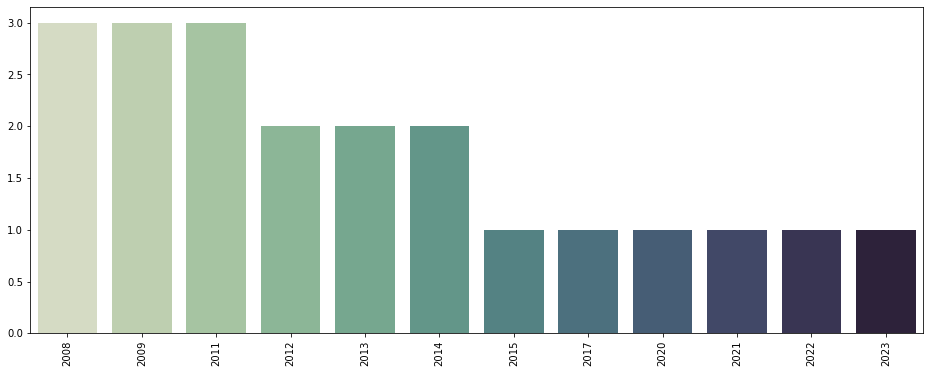

In [165]:
mag_ = df[df['MAG']>6]

plt.figure(figsize=(16,6))
pal = sns.cubehelix_palette(len(mag_.year.value_counts().index), start=.5, rot=-.75)
sns.barplot(x=np.sort(mag_.year.value_counts().index) ,y = mag_.year.value_counts().values,palette =pal )
plt.xticks(rotation=90 , color ='black')
plt.show()

In [166]:
import re

def extract_location(data):
    pattern = r'\((.*?)\)'  # Parantez içindeki kısmı ayıklamak için regex deseni
    extracted_data = re.findall(pattern, data)
    if extracted_data:
        return extracted_data[0].strip()
    else:
        return data.strip()


In [167]:
df['LOCATION_'] = df['LOCATION_'].apply(extract_location)
df.head()

,LOCATION_,LAT,LNG,MAG,DEPTH,Date,Time,year
0,ANTALYA,36.9197,30.3133,2.9,30.0,2005-01-01,00:29:42,2005
1,KONYA,38.8177,31.8875,3.5,5.8,2005-01-01,03:03:40,2005
2,AKDENiZ,36.1153,28.4915,3.5,74.5,2005-01-01,04:40:14,2005
3,ANKARA,40.3485,32.9603,3.0,15.1,2005-01-01,09:35:00,2005
4,iZMiR,38.8013,27.2075,2.9,28.3,2005-01-01,11:17:43,2005


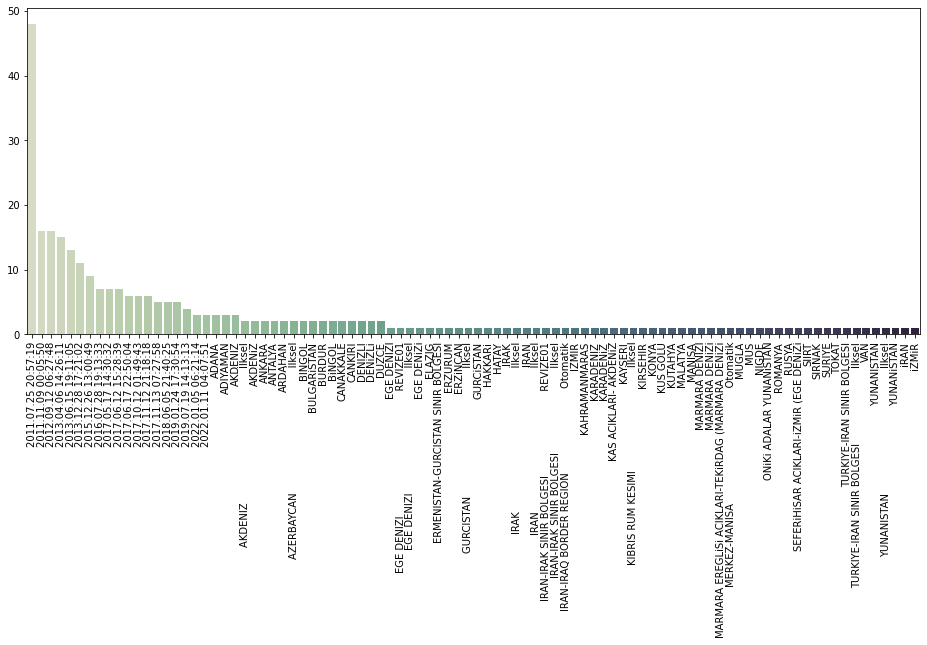

In [168]:
mag_ = df[df['MAG']>5]

plt.figure(figsize=(16,6))
pal = sns.cubehelix_palette(len(mag_.LOCATION_.value_counts().index), start=.5, rot=-.75)
sns.barplot(x=np.sort(mag_.LOCATION_.value_counts().index) ,y = mag_.LOCATION_.value_counts().values,palette =pal )
plt.xticks(rotation=90 , color ='black')
plt.show()

In [169]:
mag_.LOCATION_.unique()

array(['MUGLA', 'KAS ACIKLARI- AKDENiZ', 'HAKKARi', 'AKDENiZ', 'BiNGOL',
       'ANKARA', 'EGE DENiZi', 'iZMiR',
       'SEFERiHiSAR ACIKLARI-iZMiR (EGE DENiZi', 'MALATYA', 'KUS GOLU',
       'MARMARA DENiZi', 'ELAZIG', 'DENiZLi', 'YUNANiSTAN', 'ADIYAMAN',
       'EGE DENIZI', 'AKDENIZ', 'KARADENIZ', 'GURCiSTAN', 'KUTAHYA',
       '2011.07.25 20:57:19', 'ERZiNCAN', 'VAN', '2011.11.09 00:05:50',
       'ONiKi ADALAR YUNANiSTAN', 'IRAK', 'BULGARiSTAN',
       'MARMARA EREGLiSi ACIKLARI-TEKiRDAG (MARMARA DENiZi', 'SIRNAK',
       '2012.09.12 06:27:48', 'KAHRAMANMARAS', 'iRAN', 'KARADENiZ',
       'EGE DENIZI                                        REVIZE01',
       '2013.04.06 14:26:11', '2013.06.15 19:11:05', 'CANAKKALE',
       'YUNANISTAN',
       'GURCISTAN                                         İlksel', 'MUS',
       'IRAK                                              İlksel',
       '2013.12.28 17:21:02',
       'YUNANISTAN                                        İlksel',
       'EGE 

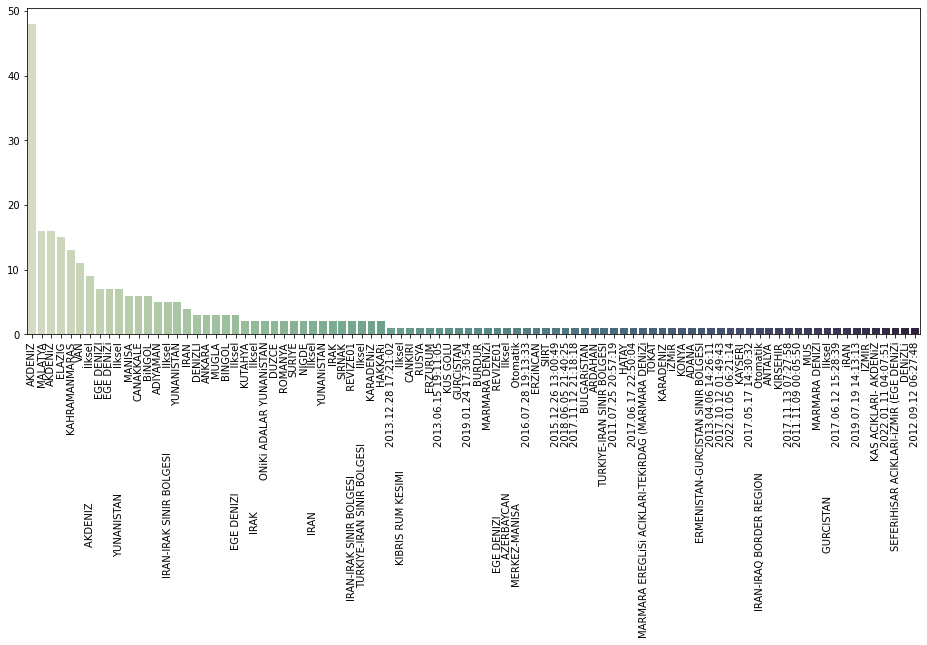

In [170]:
mag_ = df[df['MAG'] > 5]

plt.figure(figsize=(16,6))
# Sayısal olmayan verilerin seçimi
non_numeric_indices = [i for i, val in enumerate(mag_.LOCATION_.value_counts().index) if not val.isnumeric()]
non_numeric_values = mag_.LOCATION_.value_counts().values[non_numeric_indices]
non_numeric_labels = np.array(mag_.LOCATION_.value_counts().index)[non_numeric_indices]

pal = sns.cubehelix_palette(len(non_numeric_labels), start=.5, rot=-.75)
sns.barplot(x=non_numeric_labels, y=non_numeric_values, palette=pal)
plt.xticks(rotation=90, color='black')
plt.show()

In [171]:
fig = px.scatter_mapbox(mag_, lat="LAT", lon="LNG", hover_name="LOCATION_", hover_data=["DEPTH", "MAG","Date"],
                        color_discrete_sequence=["white"], zoom=5, height=800)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

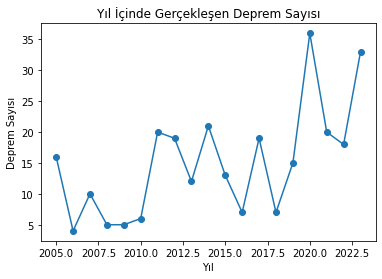

In [172]:
mag_ = df[df['MAG'] > 5]

deprem_sayisi = mag_['year'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.plot(deprem_sayisi.index, deprem_sayisi.values, marker='o')
plt.xlabel('Yıl')
plt.ylabel('Deprem Sayısı')
plt.title('Yıl İçinde Gerçekleşen Deprem Sayısı')
plt.show()

In [173]:
deprem_sayisi

2005    16
2006     4
2007    10
2008     5
2009     5
2010     6
2011    20
2012    19
2013    12
2014    21
2015    13
2016     7
2017    19
2018     7
2019    15
2020    36
2021    20
2022    18
2023    33
Name: year, dtype: int64

In [174]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [175]:
deprem_sayisi = mag_.groupby('year').size()
deprem_sayisi = deprem_sayisi.values.astype('float32')
deprem_sayisi

array([16.,  4., 10.,  5.,  5.,  6., 20., 19., 12., 21., 13.,  7., 19.,
        7., 15., 36., 20., 18., 33.], dtype=float32)

In [176]:
# Veriyi ölçeklendirin
scaler = MinMaxScaler(feature_range=(0, 1))
deprem_sayisi = scaler.fit_transform(deprem_sayisi.reshape(-1, 1))

In [177]:
# Eğitim ve test veri setlerini ayırın
train_size = int(len(deprem_sayisi) * 0.8)
test_size = len(deprem_sayisi) - train_size
train, test = deprem_sayisi[0:train_size, :], deprem_sayisi[train_size:len(deprem_sayisi), :]

In [178]:
# Veriyi LSTM modeli için uygun hale getirin
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [179]:
look_back = 1

In [180]:
trainX, trainY = create_dataset(train, look_back)

In [181]:
testX, testY = create_dataset(test, look_back)

In [182]:
# LSTM modelini oluşturun
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

Epoch 1/1000
13/13 - 6s - loss: 0.1215 - 6s/epoch - 461ms/step
Epoch 2/1000
13/13 - 0s - loss: 0.1103 - 56ms/epoch - 4ms/step
Epoch 3/1000
13/13 - 0s - loss: 0.1019 - 80ms/epoch - 6ms/step
Epoch 4/1000
13/13 - 0s - loss: 0.0936 - 70ms/epoch - 5ms/step
Epoch 5/1000
13/13 - 0s - loss: 0.0860 - 45ms/epoch - 3ms/step
Epoch 6/1000
13/13 - 0s - loss: 0.0805 - 48ms/epoch - 4ms/step
Epoch 7/1000
13/13 - 0s - loss: 0.0743 - 43ms/epoch - 3ms/step
Epoch 8/1000
13/13 - 0s - loss: 0.0700 - 52ms/epoch - 4ms/step
Epoch 9/1000
13/13 - 0s - loss: 0.0656 - 47ms/epoch - 4ms/step
Epoch 10/1000
13/13 - 0s - loss: 0.0620 - 42ms/epoch - 3ms/step
Epoch 11/1000
13/13 - 0s - loss: 0.0597 - 43ms/epoch - 3ms/step
Epoch 12/1000
13/13 - 0s - loss: 0.0558 - 54ms/epoch - 4ms/step
Epoch 13/1000
13/13 - 0s - loss: 0.0535 - 45ms/epoch - 3ms/step
Epoch 14/1000
13/13 - 0s - loss: 0.0514 - 50ms/epoch - 4ms/step
Epoch 15/1000
13/13 - 0s - loss: 0.0494 - 46ms/epoch - 4ms/step
Epoch 16/1000
13/13 - 0s - loss: 0.0485 - 71ms/ep

In [183]:
# Tahmin yapın
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 39ms/step


In [184]:
# Tahminleri ters ölçeklendirin
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [185]:

# 2022 ve 2023 için tahmin yapın
last_data = np.array([testPredict[-1]])
next_year = model.predict(np.reshape(last_data, (1, 1, 1)))
next_year = scaler.inverse_transform(next_year)
print("2022 tahmini deprem sayısı:", int(next_year[0][0]))


1/1 [==============================] - 1s 1s/step
2022 tahmini deprem sayısı: 28


In [186]:
next_next_year = model.predict(np.reshape(np.array([next_year]), (1, 1, 1)))
next_next_year = scaler.inverse_transform(next_next_year)
print("2023 tahmini deprem sayısı:", int(next_next_year[0][0]))

1/1 [==============================] - 0s 38ms/step
2023 tahmini deprem sayısı: 30


In [187]:
# 2024 için tahmin yapın
next_next_next_year = model.predict(np.reshape(np.array([next_next_year]), (1, 1, 1)))
next_next_next_year = scaler.inverse_transform(next_next_next_year)
print("2024 tahmini deprem sayısı:", int(next_next_next_year[0][0]))

1/1 [==============================] - 0s 43ms/step
2024 tahmini deprem sayısı: 30


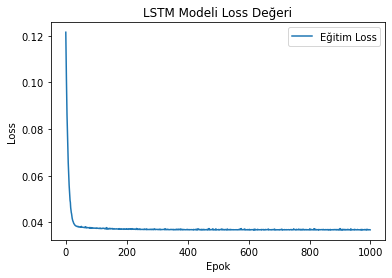

In [189]:
plt.plot(history.history['loss'], label='Eğitim Loss')
plt.xlabel('Epok')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Modeli Loss Değeri')
plt.show()

.

.

.

Other datasets

In [ ]:
tr = pd.read_csv('Turkey_earthquakes.csv')
print (tr.shape)
tr.head(5)

(78, 7)


,Date,Time‡,Place,Lat,Long,Deaths,Mag
0,10 September 1509,NaN,Constantinople,40.9,28.7,"10,000",7.2 Mw
1,23 February 1653,NaN,Smyrna,38.2,28.2,"2,500",7.5 Mw
2,17 August 1668,NaN,Anatolia,40.0,36.0,"8,000",8M w
3,10 July 1688,11:45,Smyrna,38.4,26.9,"16,000",7.0 Mw
4,22 May 1766,05:10,Istanbul,40.8,29.0,"4,000",7.1 Mw


In [ ]:
tr.Place.value_counts()

Erzincan         3
Smyrna           3
Bingöl           3
Ayvalık          2
Van              2
                ..
Kahramanmaraş    1
Yenice           1
Fethiye          1
Chios            1
Erbaa            1
Name: Place, Length: 65, dtype: int64

In [ ]:
tr.Place.describe()


count           78
unique          65
top       Erzincan
freq             3
Name: Place, dtype: object

In [ ]:
tr['geometry'] = tr.apply(lambda row:  Point(row["Long"], row["Lat"]), axis=1)
tr.head()

,Date,Time‡,Place,Lat,Long,Deaths,Mag,geometry
0,10 September 1509,NaN,Constantinople,40.9,28.7,"10,000",7.2 Mw,POINT (28.7 40.9)
1,23 February 1653,NaN,Smyrna,38.2,28.2,"2,500",7.5 Mw,POINT (28.2 38.2)
2,17 August 1668,NaN,Anatolia,40.0,36.0,"8,000",8M w,POINT (36 40)
3,10 July 1688,11:45,Smyrna,38.4,26.9,"16,000",7.0 Mw,POINT (26.9 38.4)
4,22 May 1766,05:10,Istanbul,40.8,29.0,"4,000",7.1 Mw,POINT (29 40.8)


In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      78 non-null     object 
 1   Time‡     71 non-null     object 
 2   Place     78 non-null     object 
 3   Lat       78 non-null     float64
 4   Long      78 non-null     float64
 5   Deaths    78 non-null     object 
 6   Mag       77 non-null     object 
 7   geometry  78 non-null     object 
dtypes: float64(2), object(6)
memory usage: 5.0+ KB


In [ ]:
tr["parsed_Date"] = pd.to_datetime(tr["Date"], format="%d %B %Y", errors = 'coerce')
tr.head()

,Date,Time‡,Place,Lat,Long,Deaths,Mag,geometry,parsed_Date
0,10 September 1509,NaN,Constantinople,40.9,28.7,"10,000",7.2 Mw,POINT (28.7 40.9),NaT
1,23 February 1653,NaN,Smyrna,38.2,28.2,"2,500",7.5 Mw,POINT (28.2 38.2),NaT
2,17 August 1668,NaN,Anatolia,40.0,36.0,"8,000",8M w,POINT (36 40),NaT
3,10 July 1688,11:45,Smyrna,38.4,26.9,"16,000",7.0 Mw,POINT (26.9 38.4),1688-07-10
4,22 May 1766,05:10,Istanbul,40.8,29.0,"4,000",7.1 Mw,POINT (29 40.8),1766-05-22


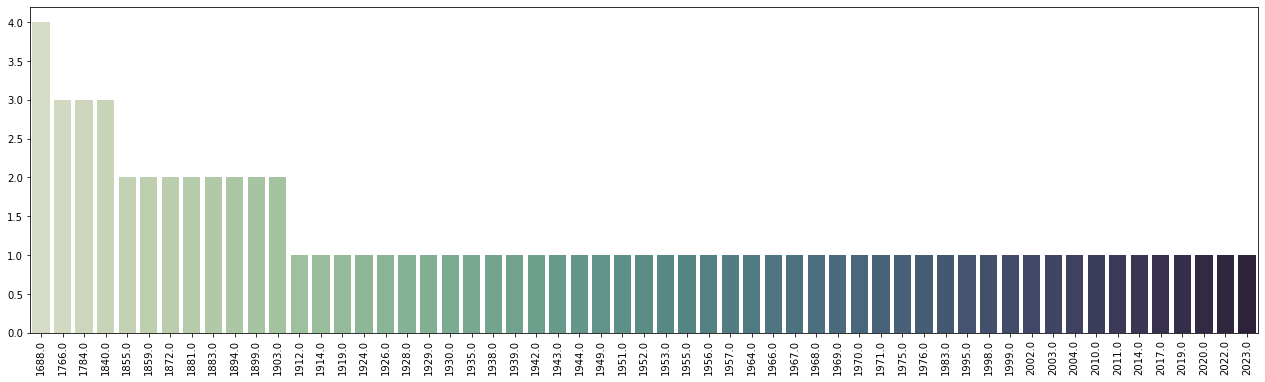

In [ ]:
tr['year'] = tr['parsed_Date'].dt.year
labels_turkey = tr.year.value_counts().index
plt.figure(figsize=(22,6))
pal = sns.cubehelix_palette(len(tr.year.value_counts().index), start=.5, rot=-.75)
sns.barplot(x=np.sort(tr.year.value_counts().index) ,y = tr.year.value_counts().values,palette =pal )
plt.xticks(rotation=90 , color ='black')
plt.show()

In [ ]:
gdf_earthquakes = gpd.GeoDataFrame(tr, geometry=tr.geometry )
print(gdf_earthquakes.shape)
gdf_earthquakes.tail()

(78, 10)


,Date,Time‡,Place,Lat,Long,Deaths,Mag,geometry,parsed_Date,year
73,14 June 2020,16:24 local time,Bingöl,39.4200,40.6700,1,5.9 Mw,POINT (40.67000 39.42000),2020-06-14,2020.0
74,30 October 2020,14:51 local time,\tAegean Sea,37.9180,26.7900,117,7.0 Mw,POINT (26.79000 37.91800),2020-10-30,2020.0
75,23 November 2022,04:08 local time,Düzce,40.8470,30.9670,2,6.1 Mw,POINT (30.96700 40.84700),2022-11-23,2022.0
76,6 February 2023,04:17 local time,Gaziantep,37.1123,37.1195,"29,600",7.8 Mw,POINT (37.11950 37.11230),2023-02-06,2023.0
77,6 February 2023,13:24 local time,Kahramanmaraş,38.0357,37.2287,"29,600",7.7 Mw,POINT (37.22870 38.03570),2023-02-06,2023.0


<AxesSubplot:>

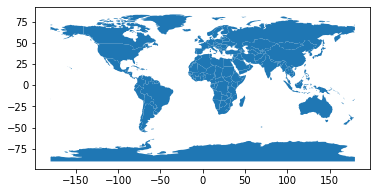

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

<AxesSubplot:>

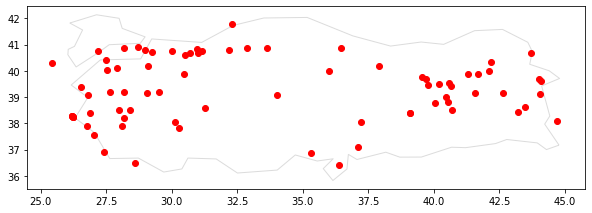

In [ ]:
ax = world[world.name=='Turkey'].plot(figsize=(10, 10), color='none', edgecolor='gainsboro')
gdf_earthquakes.plot(ax=ax, color ='red')

In [ ]:
m_1 = folium.Map(location=(TURK_LAT, TURK_LNG), titles='cartodbpositron', zooms=5)
for i, row in gdf_earthquakes.iterrows():
    popup_text = "number of Deaths : " + str(row.Deaths) + "\n Magnitude : "+ str(row.Mag) + "\n Date : " + str(row.Date)
    Marker([row.geometry.y, row.geometry.x], popup=popup_text).add_to(m_1)
m_1

In [ ]:
#Cleaning Deaths column
gdf_earthquakes.Deaths = gdf_earthquakes.Deaths.str.strip()
gdf_earthquakes.Deaths = gdf_earthquakes.Deaths.map(lambda s: s.replace(',', ''))
gdf_earthquakes.Deaths = gdf_earthquakes.Deaths.astype('int')

In [ ]:
gdf_earthquakes.loc[:, ['Lat', 'Long', 'Deaths']]


,Lat,Long,Deaths
0,40.9000,28.7000,10000
1,38.2000,28.2000,2500
2,40.0000,36.0000,8000
3,38.4000,26.9000,16000
4,40.8000,29.0000,4000
...,...,...,...
73,39.4200,40.6700,1
74,37.9180,26.7900,117
75,40.8470,30.9670,2
76,37.1123,37.1195,29600


In [ ]:
m_3 = folium.Map(location=(TURK_LAT, TURK_LNG),zooms=15)
HeatMap(gdf_earthquakes.loc[:, ['Lat', 'Long', 'Deaths']], gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}).add_to(m_3)
m_3


In [ ]:
fig = px.scatter_mapbox(gdf_earthquakes, lat="Lat", lon="Long", hover_name="Place", hover_data=["Mag", "parsed_Date"],
                        color_discrete_sequence=["light green"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
gdf_earthquakes.dropna(subset=['year'],inplace=True)

In [ ]:
gdf_earthquakes['Mag'] = gdf_earthquakes['Mag'].str.split(' ', n=1, expand=True)[0]
gdf_earthquakes['Mag'] = gdf_earthquakes['Mag'].astype(float)
gdf_earthquakes

,Date,Time‡,Place,Lat,Long,Deaths,Mag,geometry,parsed_Date,year
3,10 July 1688,11:45,Smyrna,38.4000,26.9000,16000,7.0,POINT (26.90000 38.40000),1688-07-10,1688.0
4,22 May 1766,05:10,Istanbul,40.8000,29.0000,4000,7.1,POINT (29.00000 40.80000),1766-05-22,1766.0
5,23 July 1784,NaN,Erzincan,39.5000,40.2000,7500,7.6,POINT (40.20000 39.50000),1784-07-23,1784.0
6,2 July 1840,NaN,Ağrı,39.6000,44.1000,10000,7.4,POINT (44.10000 39.60000),1840-07-02,1840.0
7,28 February 1855,01:00,Bursa,40.2000,29.1000,1900,6.7,POINT (29.10000 40.20000),1855-02-28,1855.0
...,...,...,...,...,...,...,...,...,...,...
73,14 June 2020,16:24 local time,Bingöl,39.4200,40.6700,1,5.9,POINT (40.67000 39.42000),2020-06-14,2020.0
74,30 October 2020,14:51 local time,\tAegean Sea,37.9180,26.7900,117,7.0,POINT (26.79000 37.91800),2020-10-30,2020.0
75,23 November 2022,04:08 local time,Düzce,40.8470,30.9670,2,6.1,POINT (30.96700 40.84700),2022-11-23,2022.0
76,6 February 2023,04:17 local time,Gaziantep,37.1123,37.1195,29600,7.8,POINT (37.11950 37.11230),2023-02-06,2023.0
